<a href="https://colab.research.google.com/github/dhgrassi/Grupo-de-Estudos-DS/blob/main/ARIMA_SARIMAX_Insumo_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIBRARIES IMPORT, SKTIME AND STATSMODELS INSTALLING AND DATASET IMPORT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import pandas as pd
from scipy import stats
from scipy.stats import norm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install statsmodels  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 27.8 MB/s 
     |████████████████████████████████| 9.8 MB 40.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series

In [ ]:
#Dataset import
from google.colab import files
uploaded = files.upload()

Saving Insumo 6 - FH 15d.xlsx to Insumo 6 - FH 15d.xlsx


BASICS OF THE TIME SERIES

In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Insumo 6 - FH 15d.xlsx']))
df

,Data,Nível Insumo 6 (%)
0,2020-01-01,32.936077
1,2020-01-16,66.345352
2,2020-01-31,55.313564
3,2020-02-15,51.769299
4,2020-03-01,48.336342
...,...,...
58,2022-05-20,27.503260
59,2022-06-04,35.460827
60,2022-06-19,47.314720
61,2022-07-04,39.901764


In [ ]:
#Setting date as the index
df.set_index('Data', inplace=True, drop=True)

In [ ]:
#Checking if data is the index
df.head()

,Nível Insumo 9 (%)
Data,
2020-01-01,59.736069
2020-01-04,17.647617
2020-01-07,43.989300
2020-01-10,51.878063
2020-01-13,19.164509


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 441 entries, 2020-01-01 to 2022-05-30
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nível do Tanque (%)  441 non-null    float64
dtypes: float64(1)
memory usage: 6.9 KB


PRE-PROCESSING

In [ ]:
#Nível Insumo 9 column has non numeric values
#list of non real values
nans = df[~df.applymap(np.isreal).all(1)]
nans

,Nível Insumo 9 (%)
Data,


In [ ]:
#transforming strings in Nan
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
#filling Nan values with previous valid number
#df.fillna(method="ffill", inplace="true")
df = df.fillna(df.mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 2020-01-01 to 2022-07-19
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nível Insumo 6 (%)  63 non-null     float64
dtypes: float64(1)
memory usage: 1008.0 bytes


Text(0.5, 1.0, 'Insumo 9')

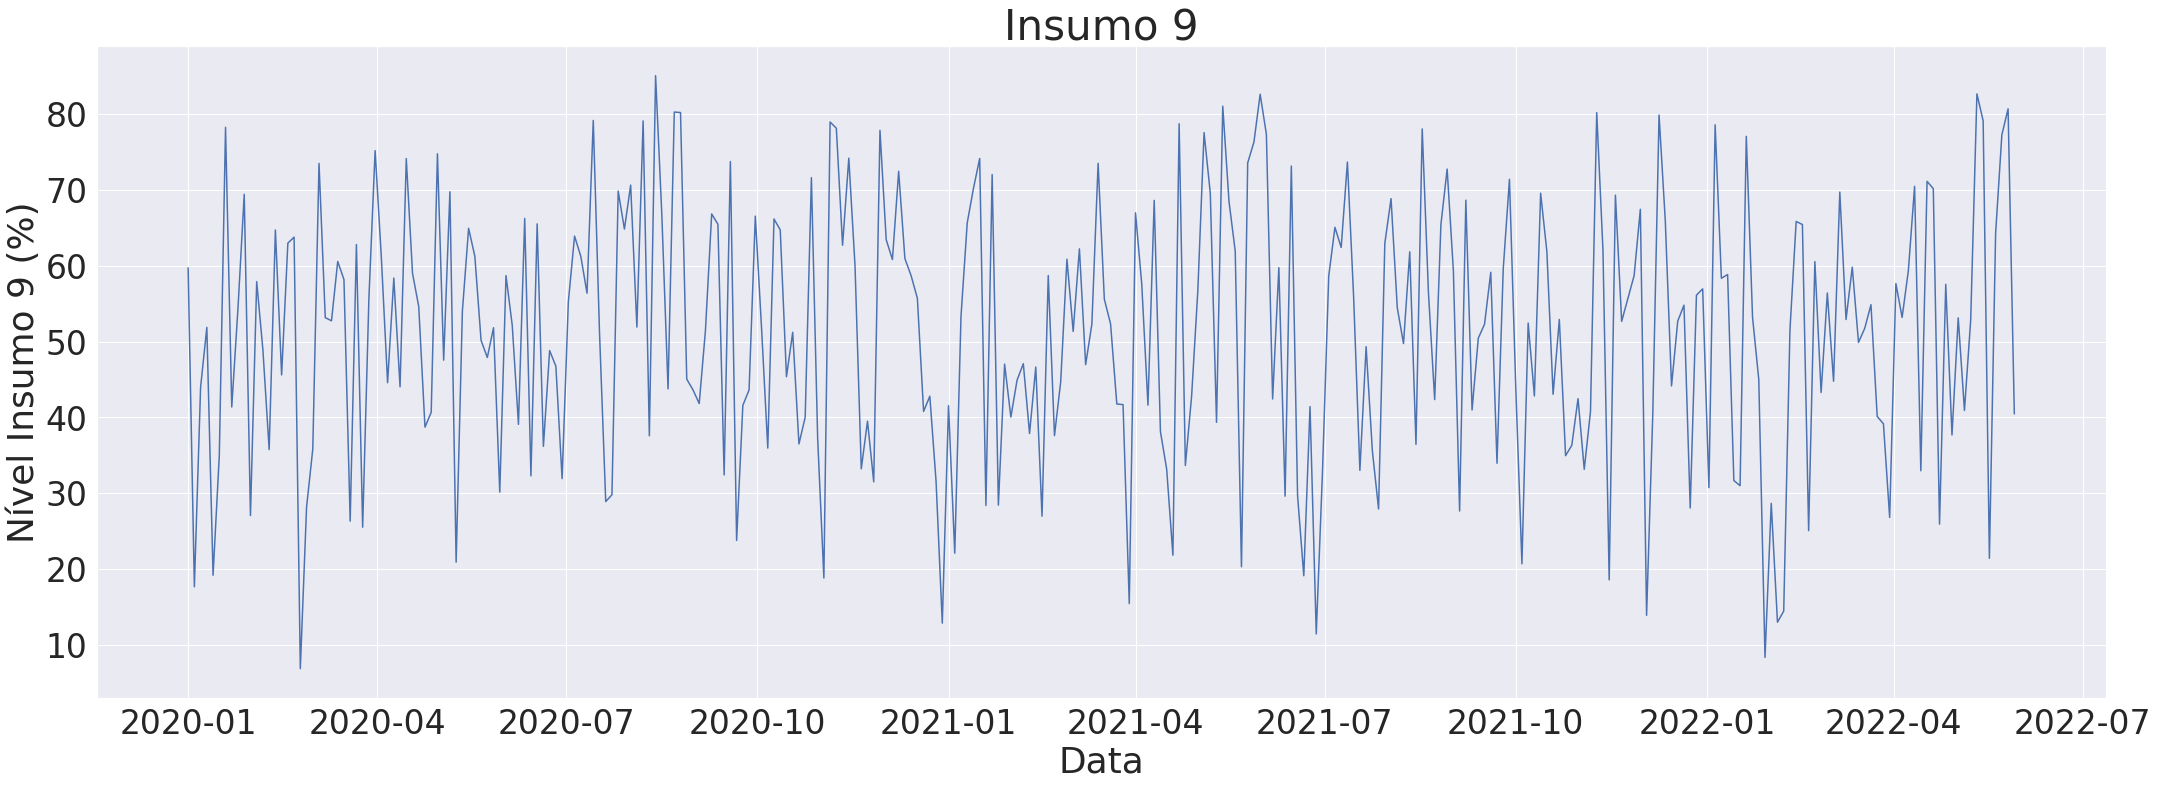

In [ ]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(36, 12)

# Setting the font scale
sns.set(font_scale=3)
sns.lineplot(x='Data', 
                y='Nível Insumo 9 (%)', 
                data=df)
plt.title("Insumo 9", fontsize=42)

Text(0.5, 1.0, 'Insumo 9')

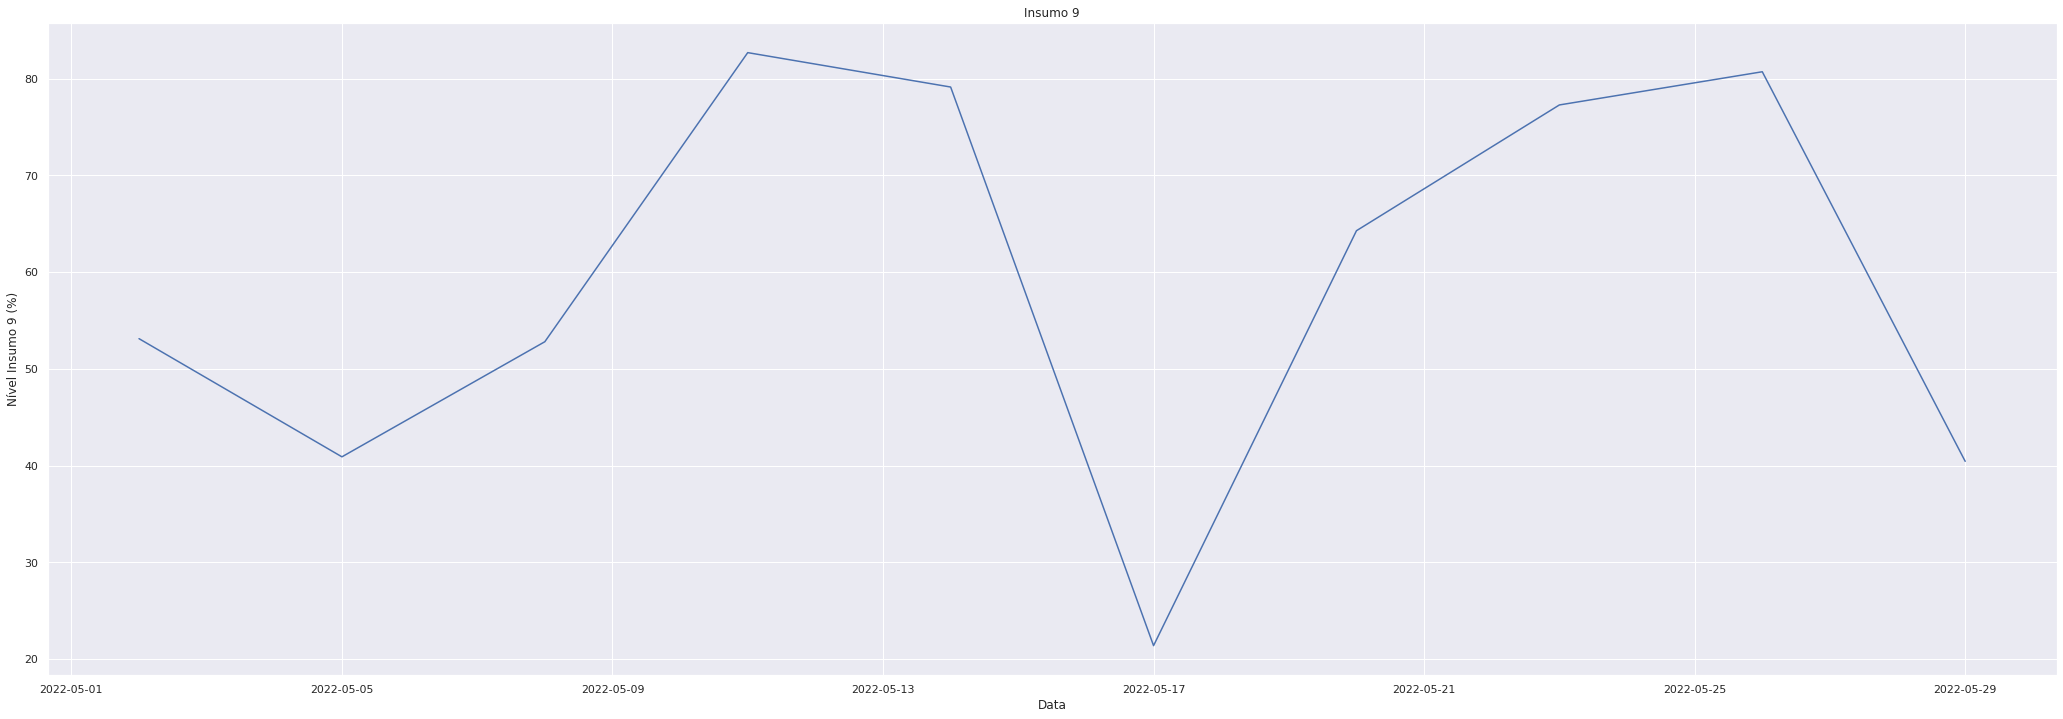

In [ ]:
df_zoom = df.loc[(df.index >= "2022-05-01 00:00") & (df.index <= "2022-05-31 21:00")]

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(36, 12)

# Setting the font scale
sns.set(font_scale=1)
sns.lineplot(x='Data', 
                y='Nível Insumo 9 (%)', 
                data=df_zoom)
plt.title("Insumo 9", fontsize=12)

ARIMA

In [ ]:
#First we need to ensure DF frequency is D
df = df.resample('15d').mean() 

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 34.5 MB/s 


In [ ]:
y_train, y_test = temporal_train_test_split(df, test_size=20)
# we will try to forecast y_test from y_train

In [ ]:
y_train


,Nível Insumo 6 (%)
Data,
2020-01-01,32.936077
2020-01-16,66.345352
2020-01-31,55.313564
2020-02-15,51.769299
2020-03-01,48.336342
2020-03-16,50.818832
2020-03-31,59.878677
2020-04-15,66.390152
2020-04-30,41.517712


In [ ]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2021-10-07', '2021-10-22', '2021-11-06', '2021-11-21',
               '2021-12-06', '2021-12-21', '2022-01-05', '2022-01-20',
               '2022-02-04', '2022-02-19', '2022-03-06', '2022-03-21',
               '2022-04-05', '2022-04-20', '2022-05-05', '2022-05-20',
               '2022-06-04', '2022-06-19', '2022-07-04', '2022-07-19'],
              dtype='datetime64[ns]', name='Data', freq='15D', is_relative=False)

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7c55a8b910>)

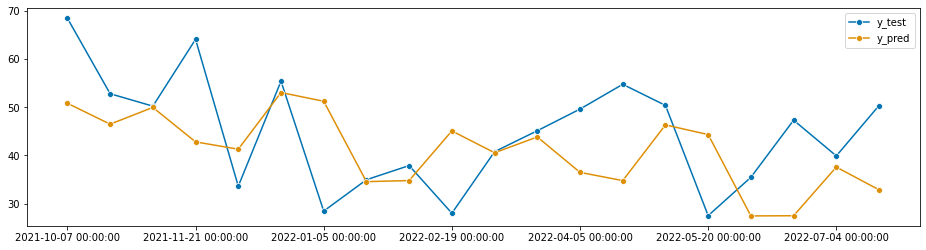

In [ ]:
from sktime.forecasting.arima import ARIMA

forecaster = ARIMA(
    order=(0, 1, 4), seasonal_order=(0, 1, 0, 9), suppress_warnings=True
)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_test, y_pred, labels=["y_test", "y_pred"])

In [ ]:
# Importing the function
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

10.106916436043582